In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(color_codes=True)
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import cross_val_score, KFold

In [36]:
df=pd.read_csv("Download/2020_Competition_Training.csv")

In [37]:
df.drop(['person_id_syn','hedis_ami','zip_cd', 'cnty_cd', 'state_cd'],axis=1, inplace=True)

### The X variables are selected based on feature engineering part

In [239]:
x=df.loc[:,['cms_ma_risk_score_nbr', 'med_er_visit_ct_pmpm', 'dcsi_score', 'credit_hh_agencyfirstmtg_new',\
        'cons_n65p_y', 'betos_m1b_pmpm_ct', 'credit_bal_autobank', 'cms_partd_ra_factor_amt', 'rx_mail_pmpm_ct',\
        'credit_bal_mtgcredit_new', 'credit_hh_autobank', 'ccsp_220_ind', 'bh_bipr_ind', 'cms_rx_risk_score_nbr',\
        'credit_hh_studentloan_60dpd', 'ccsp_239_ind', 'cms_ra_factor_type_cd_CF', 'rx_gpi2_49_pmpm_ct', 'cms_low_income_ind', \
        'cons_homstat_Y', 'total_outpatient_visit_ct_pmpm', 'submcc_men_othr_pmpm_ct', 'submcc_ner_othr_pmpm_ct', 'pdc_dep',\
        'betos_t1a_ind', 'cms_disabled_ind', 'fci_score', 'bh_cdto_ind', 'cms_ra_factor_type_cd_CN', 'cons_hhcomp_B',\
        'submcc_ner_infl_ind', 'rev_cms_ambul_ind', 'submcc_trm_skul_pmpm_ct', 'rx_gpi2_87_pmpm_ct', 'hlth_pgm_slvrsnkr_pct_par',\
        'submcc_men_alco_ind', 'cmsd2_men_mad_ind', 'cms_ra_factor_type_cd_CP', 'est_age']] 
#,'rx_branded_pmpm_ct','rx_generic_pmpm_ct','rx_maint_pmpm_ct','rx_overall_pmpm_ct'

In [133]:
x

,cms_ma_risk_score_nbr,med_er_visit_ct_pmpm,dcsi_score,credit_hh_agencyfirstmtg_new,cons_n65p_y,betos_m1b_pmpm_ct,credit_bal_autobank,cms_partd_ra_factor_amt,rx_mail_pmpm_ct,credit_bal_mtgcredit_new,...,cons_hhcomp_B,submcc_ner_infl_ind,rev_cms_ambul_ind,submcc_trm_skul_pmpm_ct,rx_gpi2_87_pmpm_ct,hlth_pgm_slvrsnkr_pct_par,submcc_men_alco_ind,cmsd2_men_mad_ind,cms_ra_factor_type_cd_CP,est_age
0,0.870,0.000000,1,1.206673,1.0,1.162658,2245.510843,0.890,0.000000,3490.404665,...,0,0,0,0.0,0.0,0.0,0,0,0,62
1,0.710,0.000000,2,2.153591,0.0,1.155124,4759.465844,1.728,0.627787,8050.919591,...,0,0,0,0.0,0.0,1.0,0,1,1,59
2,3.091,0.000000,0,4.132882,0.0,0.333333,6064.546605,1.594,3.333333,24693.512063,...,0,0,0,0.0,0.0,0.0,0,0,0,63
3,0.526,0.000000,0,0.607081,1.0,0.250000,6106.353309,0.779,2.500000,3343.460749,...,0,0,0,0.0,0.0,1.0,0,0,0,75
4,0.680,0.083333,1,0.959273,0.0,0.083333,2944.040395,2.398,0.433333,2484.190721,...,0,0,0,0.0,0.0,0.0,0,0,0,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69567,0.551,0.000000,2,2.605074,1.0,1.250000,3311.871093,0.821,2.166667,7543.520155,...,0,0,0,0.0,0.0,0.0,0,0,0,72
69568,2.240,0.000000,3,1.784546,1.0,1.668168,3545.681376,1.418,2.571778,4188.579397,...,0,0,0,0.0,0.0,1.0,0,0,0,75
69569,2.026,0.083333,2,1.816741,1.0,0.666667,2918.979683,0.896,1.666667,4497.228700,...,1,0,0,0.0,0.0,0.0,0,0,0,76
69570,0.588,0.000000,0,1.338902,0.0,0.116657,2457.155934,0.724,0.083333,5221.804988,...,0,0,0,0.0,0.0,0.0,0,0,0,67


In [137]:
y=df.transportation_issues

### Split train and test

In [246]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state = 42)

### Standardization

In [247]:
from sklearn.preprocessing import StandardScaler

# initialize a scaler object
scaler = StandardScaler()

# transform training set
x_train_std = scaler.fit_transform(x_train)

# the same transform for test set
x_test_std = scaler.transform(x_test)

# transform whole dataset 
X = scaler.fit_transform(x)

## Modeling

### Logistic Regression

0.7024722115753163
[[12711  5128]
 [ 1082  1951]]
              precision    recall  f1-score   support

           0       0.92      0.71      0.80     17839
           1       0.28      0.64      0.39      3033

    accuracy                           0.70     20872
   macro avg       0.60      0.68      0.59     20872
weighted avg       0.83      0.70      0.74     20872



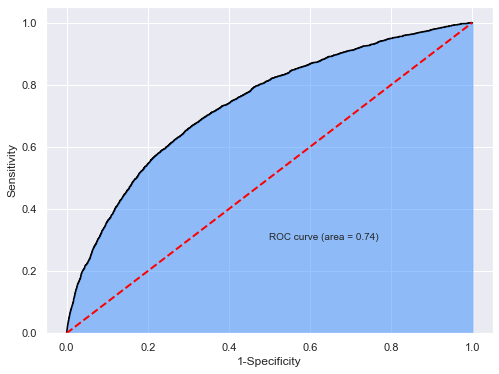

In [258]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

LR = LogisticRegression(class_weight='balanced')
LR.fit(x_train_std,y_train)
predict_results=LR.predict(x_test_std)
print(accuracy_score(predict_results, y_test))
conf_mat = confusion_matrix(y_test, predict_results)
print(conf_mat)
print(classification_report(y_test, predict_results))

# calculate roc/auc
y_score = LR.predict_proba(x_test_std)[:,1]
fpr,tpr,threshold = metrics.roc_curve(y_test, y_score)
roc_auc = metrics.auc(fpr,tpr)

# roc plot
f,ax = plt.subplots(figsize=(8,6))
plt.stackplot(fpr, tpr, color='#338DFF', alpha = 0.5, edgecolor = 'black')
plt.plot(fpr, tpr, color='black', lw = 1.5)
plt.plot([0,1],[0,1], color = 'red', linestyle = '--', lw = 2)
plt.text(0.5,0.3,'ROC curve (area = %0.2f)' % roc_auc)
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.show()

In [220]:
coef=LR.coef_.tolist()
coef=pd.Series(coef[0])

In [186]:
#p-value
import statsmodels.api as sm
sm_model = sm.Logit(y_train, sm.add_constant(x_train_std)).fit(disp=0)
pvalue=pd.Series(sm_model.pvalues.tolist())
pvalue=pd.concat({'coef':coef,'p':pvalue},axis=1)

In [189]:
col=x.columns.tolist()

In [190]:
col=pd.DataFrame({'col':col})

In [196]:
Col=pd.concat([col,pvalue],axis=1).sort_values(by=['coef'],ascending=False)
Col['Sig']=Col.apply(lambda x: 'True' if x['p']<0.05 else 'False',axis=1)
Col.loc[:10,:]

,col,coef,p,Sig
9,ccsp_239_ind,0.242606,7.658388e-09,True
11,cms_low_income_ind,0.180043,8.296471e-01,False
15,cms_disabled_ind,0.113654,2.192628e-12,True
72,cat_est_age_Group4,0.111210,NaN,False
73,cat_est_age_Group5,0.104102,NaN,False
26,cmsd2_men_mad_ind,0.093352,1.720510e-05,True
8,credit_hh_studentloan_60dpd,0.081001,4.727044e-05,True
16,fci_score,0.076559,4.047946e-09,True
71,cat_est_age_Group3,0.069764,NaN,False
0,cms_ma_risk_score_nbr,0.067564,0.000000e+00,True


### Only keep the significant features

In [122]:
x=df.loc[:,['cms_ma_risk_score_nbr', 'med_er_visit_ct_pmpm', 'dcsi_score', 'credit_hh_agencyfirstmtg_new',\
        'betos_m1b_pmpm_ct', 'credit_bal_autobank',\
        'credit_bal_mtgcredit_new','bh_bipr_ind', 'cms_rx_risk_score_nbr',\
        'credit_hh_studentloan_60dpd', 'ccsp_239_ind', 'cms_ra_factor_type_cd_CF', 'cms_low_income_ind', \
        'cons_homstat_Y', 'total_outpatient_visit_ct_pmpm', 'submcc_men_othr_pmpm_ct', 'pdc_dep',\
        'betos_t1a_ind', 'cms_disabled_ind', 'fci_score', 'bh_cdto_ind', 'cms_ra_factor_type_cd_CN', 'cons_hhcomp_B',\
        'submcc_men_alco_ind', 'cmsd2_men_mad_ind', 'cms_ra_factor_type_cd_CP', 'est_age']] 

In [123]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state = 42)
from sklearn.preprocessing import StandardScaler

# initialize a scaler object
scaler = StandardScaler()

# transform training set
x_train_std = scaler.fit_transform(x_train)

# the same transform for test set
x_test_std = scaler.transform(x_test)

# transform whole dataset 
X = scaler.fit_transform(x)

In [124]:
LR = LogisticRegression()
LR.fit(x_train_std,y_train)
predict_results=LR.predict(x_test_std)
print(accuracy_score(predict_results, y_test))
conf_mat = confusion_matrix(y_test, predict_results)
print(conf_mat)
print(classification_report(y_test, predict_results))

0.8566021464162514
[[17642   197]
 [ 2796   237]]
              precision    recall  f1-score   support

           0       0.86      0.99      0.92     17839
           1       0.55      0.08      0.14      3033

    accuracy                           0.86     20872
   macro avg       0.70      0.53      0.53     20872
weighted avg       0.82      0.86      0.81     20872



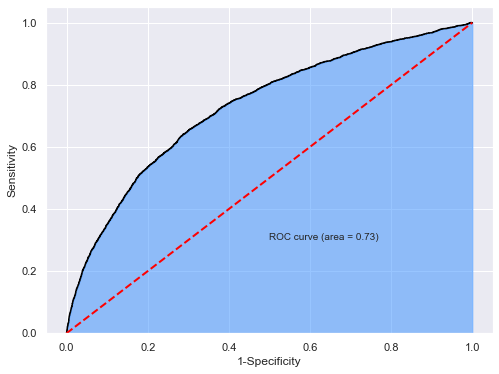

In [125]:
from sklearn import metrics
# calculate roc/auc
y_score = LR.predict_proba(x_test_std)[:,1]
fpr,tpr,threshold = metrics.roc_curve(y_test, y_score)
roc_auc = metrics.auc(fpr,tpr)

# roc plot
f,ax = plt.subplots(figsize=(8,6))
plt.stackplot(fpr, tpr, color='#338DFF', alpha = 0.5, edgecolor = 'black')
plt.plot(fpr, tpr, color='black', lw = 1.5)
plt.plot([0,1],[0,1], color = 'red', linestyle = '--', lw = 2)
plt.text(0.5,0.3,'ROC curve (area = %0.2f)' % roc_auc)
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.show()

### Change parameters

In [126]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

# Parameters
params = {'C':[0.0001, 1, 100, 1000],
          'max_iter':[1, 10, 100, 500],
          'class_weight':['balanced', None],
          'solver':['liblinear','sag','lbfgs','newton-cg']
         }
LR3 = LogisticRegression()
clf = GridSearchCV(LR3, param_grid=params, cv=10)
clf.fit(x_train_std,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.0001, 1, 100, 1000],
                         'class_weight': ['balanced', None],
                         'max_iter': [1, 10, 100, 500],
                         'solver': ['liblinear', 'sag', 'lbfgs', 'newton-cg']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             sc

In [127]:
clf.best_params_

{'C': 1, 'class_weight': None, 'max_iter': 10, 'solver': 'sag'}

In [128]:
# calculate the accuracy score based on the best params
LR4 = LogisticRegression(**clf.best_params_)
LR4.fit(x_train_std, y_train)
predict_results=LR4.predict(x_test_std)
print(accuracy_score(predict_results, y_test))
conf_mat = confusion_matrix(y_test, predict_results)
print(conf_mat)
print(classification_report(y_test, predict_results))

0.8566021464162514
[[17636   203]
 [ 2790   243]]
              precision    recall  f1-score   support

           0       0.86      0.99      0.92     17839
           1       0.54      0.08      0.14      3033

    accuracy                           0.86     20872
   macro avg       0.70      0.53      0.53     20872
weighted avg       0.82      0.86      0.81     20872



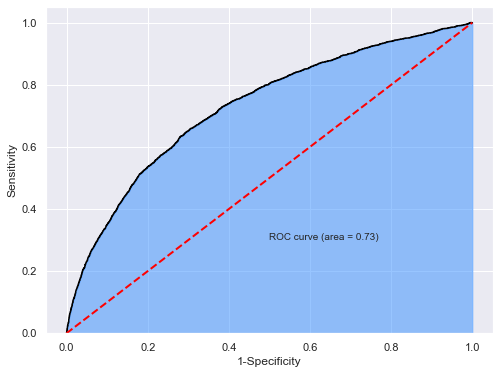

In [129]:
from sklearn import metrics
# calculate roc/auc
y_score = LR4.predict_proba(x_test_std)[:,1]
fpr,tpr,threshold = metrics.roc_curve(y_test, y_score)
roc_auc = metrics.auc(fpr,tpr)

# roc plot
f,ax = plt.subplots(figsize=(8,6))
plt.stackplot(fpr, tpr, color='#338DFF', alpha = 0.5, edgecolor = 'black')
plt.plot(fpr, tpr, color='black', lw = 1.5)
plt.plot([0,1],[0,1], color = 'red', linestyle = '--', lw = 2)
plt.text(0.5,0.3,'ROC curve (area = %0.2f)' % roc_auc)
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.show()
